In [1]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

def image_counter_from_path(path: str):
    data = []

    # Walk through each directory and sub-directory
    for root, dirs, files in os.walk(path):
        image_count = 0
        for file in files:
            # Check if file is an image
            try:
                with Image.open(os.path.join(root, file)) as img:
                    image_count += 1
            except (IOError, OSError):
                continue
        
        # Store folder name and image count
        if image_count > 0:
            folder_name = os.path.basename(root)
            data.append({'Folder': folder_name, 'Image Count': image_count})
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    return df

In [1]:
import os
import pandas as pd
from PIL import Image
from collections import defaultdict

def image_counter_from_paths(paths: dict):
    data = defaultdict(lambda: defaultdict(int))
    
    # Iterate over each path provided in the dictionary
    for key, path in paths.items():
        for root, dirs, files in os.walk(path):
            # Skip the root path, only count sub-folders
            if root == path:
                continue
            
            image_count = 0
            for file in files:
                try:
                    with Image.open(os.path.join(root, file)) as img:
                        image_count += 1
                except (IOError, OSError):
                    continue
            
            # Store image counts by sub-folder and key
            folder_name = os.path.relpath(root, path)  # Get relative sub-folder name
            data[folder_name][key] = image_count
    
    # Convert data to DataFrame
    df = pd.DataFrame(data).T.fillna(0).astype(int)
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Folder'}, inplace=True)
    
    return df

In [2]:
sources = {
    "fish_functions": '/Users/leonardo/Library/CloudStorage/Box-Box/CryptoVision/Data/fish_functions/Species_v03',
    "web": '/Users/leonardo/Library/CloudStorage/Box-Box/CryptoVision/Data/web/Species_v01',
    "inatlist": '/Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v03',
    "chris": '/Volumes/T7_shield/CryptoVision/Data/others/hemingson_photos/others_organized/Species',
    "lirs23": '/Volumes/T7_shield/CryptoVision/Data/others/hemingson_photos/LIRS23_organized/Species',
    "lauli": '/Volumes/T7_shield/CryptoVision/Data/others/jeannot_photos/cv_organized/03_Species',
}

df_counter = image_counter_from_paths(sources)

In [3]:
df_counter.head()

Folder  fish_functions  inatlist  lauli  web  \
0         Pomacentridae_Chromis_iomelas              57       182      9    0   
1          Labridae_Halichoeres_claudia              50       128      0  111   
2  Scorpaenidea_Scorpaenodes_caribbaeus             162        41      0    0   
3         Labridae_Labroides_dimidiatus               7       200      0  254   
4          Gobiidae_Lythrypnus_nesiotes              31         1      0    3   

   lirs23  chris  
0       0      0  
1       0      0  
2       0      0  
3       2      0  
4       0      0

In [7]:
tot = df_counter['fish_functions'].sum()\
    + df_counter['web'].sum()\
    + df_counter['inatlist'].sum()\
    + df_counter['lauli'].sum()\
    + df_counter['lirs23'].sum()\
    + df_counter['chris'].sum()\

print(f"Total images: {tot}")
print(f"fish_functions: {df_counter['fish_functions'].sum()} - {df_counter['fish_functions'].sum() / tot * 100:.2f}%")
print(f"Web: {df_counter['web'].sum()} - {df_counter['web'].sum() / tot * 100:.2f}%")
print(f"iNaturalist: {df_counter['inatlist'].sum()} - {df_counter['inatlist'].sum() / tot * 100:.2f}%")
print(f"lauli: {df_counter['lauli'].sum()} - {df_counter['lauli'].sum() / tot * 100:.2f}%")
print(f"lirs23: {df_counter['lirs23'].sum()} - {df_counter['lirs23'].sum() / tot * 100:.2f}%")
print(f"chris: {df_counter['chris'].sum()} - {df_counter['chris'].sum() / tot * 100:.2f}%")


Total images: 35302
fish_functions: 7672 - 21.73%
Web: 8751 - 24.79%
iNaturalist: 17261 - 48.90%
lauli: 369 - 1.05%
lirs23: 878 - 2.49%
chris: 371 - 1.05%


In [7]:
df_counter['sum'] = df_counter['fish_functions'] + df_counter['web'] + df_counter['inatlist']

In [33]:
df_counter.describe()

fish_functions         web    inatlist         sum
count      107.000000  107.000000  107.000000  107.000000
mean        71.700935   81.813084   26.168224  179.682243
std         77.250904  137.960216   17.891964  164.149012
min          0.000000    0.000000    0.000000    1.000000
25%         23.000000    0.000000    7.000000   62.500000
50%         50.000000   25.000000   32.000000  136.000000
75%         86.500000   81.000000   38.000000  235.000000
max        467.000000  766.000000   83.000000  854.000000

In [23]:
# create a list of folders names from the df_counter where the fish_functions column is lower than 30
folders = df_counter[df_counter['fish_functions'] < 25]['Folder'].tolist()

set(folders)

{'Apogonidae_Apogon_maculatus',
 'Blenniidae_Ecsenius_bicolor',
 'Chaetodontidae_Chaetodon_quadrimaculatus',
 'Dactyloscopidae_Gillellus_uranidae',
 'Gobiesocidae_Acyrtus_lanthanum',
 'Gobiidae_Aioliops_megastigma',
 'Gobiidae_Cryptopsilotris_batrachodes',
 'Gobiidae_Eviota_flavipinnata',
 'Gobiidae_Eviota_maculosa',
 'Gobiidae_Eviota_monostigma',
 'Gobiidae_Eviota_nebulosa',
 'Gobiidae_Gobiodon_axillaris',
 'Gobiidae_Gobiodon_brochus',
 'Gobiidae_Gobiodon_erythrospilus',
 'Gobiidae_Gobiodon_oculolineatus',
 'Gobiidae_Gobiodon_reticulatus',
 'Gobiidae_Hetereleotris_vulgaris',
 'Gobiidae_Trimma_maiandros',
 'Labridae_Gomphosus_varius',
 'Labridae_Labroides_dimidiatus',
 'Monacanthidae_Monacanthus_tuckeri',
 'Plesiopidae_Assessor_flavissimus',
 'Pomacentridae_Chromis_atripectoralis',
 'Pomacentridae_Chromis_margaritifer',
 'Pomacentridae_Chromis_vanbebberae',
 'Sciaenidae_Eques_punctatus',
 'Scorpaenidae_Scorpaenodes_varipinnis',
 'Tripterygiidae_Enneanectes_matador'}

Apogonidae
│── Apogon maculatus
Blenniidae
│── Ecsenius bicolor
Chaetodontidae
│── Chaetodon quadrimaculatus
Dactyloscopidae
│── Gillellus uranidae
Gobiesocidae
│── Acyrtus lanthanum
Gobiidae
│── Aioliops megastigma
│── Cryptopsilotris batrachodes
│── Eviota
│   │── flavipinnata
│   │── maculosa
│   │── monostigma
│   │── nebulosa
│── Gobiodon
│   │── axillaris
│   │── brochus
│   │── erythrospilus
│   │── oculolineatus
│   │── reticulatus
│── Hetereleotris vulgaris
│── Trimma maiandros
Labridae
│── Gomphosus varius
│── Labroides dimidiatus
Monacanthidae
│── Monacanthus tuckeri
Plesiopidae
│── Assessor flavissimus
Pomacentridae
│── Chromis
│   │── atripectoralis
│   │── margaritifer
│   │── vanbebberae
Sciaenidae
│── Eques punctatus
Scorpaenidae
│── Scorpaenodes varipinnis
Tripterygiidae
│── Enneanectes matador

In [8]:
df_counter.head()

Folder  fish_functions  inatlist  lauli  web  \
0         Pomacentridae_Chromis_iomelas              57       182      9    0   
1          Labridae_Halichoeres_claudia              50       128      0  111   
2  Scorpaenidea_Scorpaenodes_caribbaeus             162        41      0    0   
3         Labridae_Labroides_dimidiatus               7       200      0  254   
4          Gobiidae_Lythrypnus_nesiotes              31         1      0    3   

   lirs23  chris  
0       0      0  
1       0      0  
2       0      0  
3       2      0  
4       0      0

In [9]:
df_counter['fish_functions'].mean()

39.751295336787564

In [10]:
def plot_stacked_image_count(df_counter, log_scale=False, figsize=(12, 8)):
    # Sort DataFrame alphabetically by Folder name
    df_sorted = df_counter.sort_values(by='Folder', ascending=True)
    
    # Calculate total image count for each folder
    total_counts = df_sorted.drop('Folder', axis=1).sum(axis=1)
    
    # Plotting
    plt.figure(figsize=figsize)
    ax = df_sorted.set_index('Folder').plot(kind='barh', stacked=True, ax=plt.gca(), logx=log_scale)

    # Highlight folder names in red if total count is below 50
    for i, (label, total) in enumerate(zip(ax.get_yticklabels(), total_counts)):
        if total < 50:
            label.set_color('red')

    # Add vertical lines for every 10 images
    max_count = total_counts.max()
    step = 10
    for x in range(0, int(max_count) + step, step):
        plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

    # Set axis labels and title
    plt.xlabel('Number of Images (log scale)' if log_scale else 'Number of Images')
    plt.ylabel('Folder')
    plt.title('Stacked Image Count by Folder from Multiple Paths')
    plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

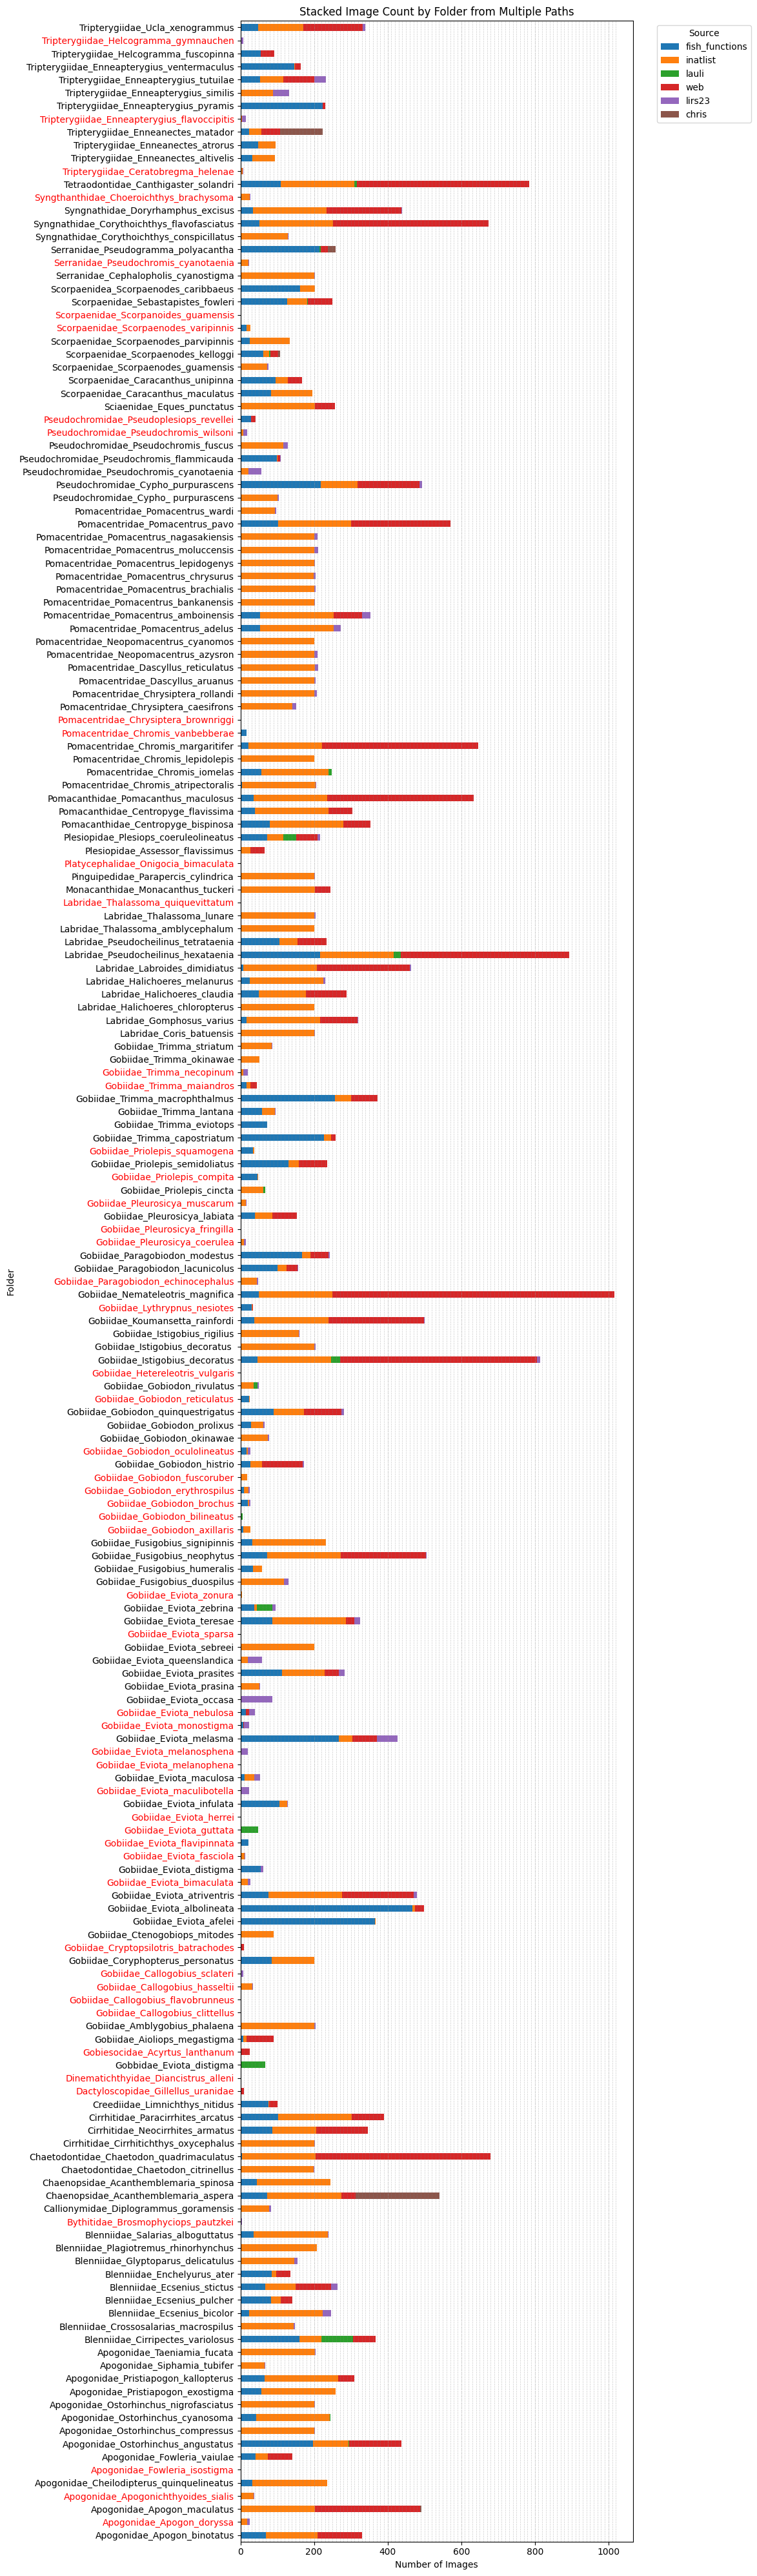

In [18]:
import matplotlib.pyplot as plt

plot_stacked_image_count(df_counter, log_scale=False, figsize=(12, 40))

In [12]:
def list_compare(list1, list2):
    return {
        'list1 - list2':list(set(list1) - set(list2)),
        'list2 - list1':list(set(list2) - set(list1)),
    }

In [6]:
PATH

'/Volumes/T7_shield/CryptoVision/Data/fish&functions_lab/cryptovision_reviewed/Species'

In [8]:
species_list_ff = os.listdir(PATH)
species_list_web = os.listdir("/Volumes/T7_shield/CryptoVision/Data/web/species")

In [13]:
list_compare(species_list_web, species_list_ff)

{'list1 - list2': ['Gobiidae_Lythrypnus_nesiotes',
  'Pseudochromidae_Pseudoplesiops_revellei',
  'Gobiidae_Hetereleotris_vulgaris',
  'Gobiidae_Cryptopsilotris_batrachodes',
  'Plesiopidae_Assessor_flavissimus',
  'Dactyloscopidae_Gillellus_uranidae',
  'Gobiidae_Pleurosicya_labiata',
  'Monacanthidae_Monacanthus_tuckeri',
  'Gobiesocidae_Acyrtus_lanthanum'],
 'list2 - list1': ['Gobiidae_Priolepis_compita',
  'Gobiidae_Eviota_distigma',
  'Labridae_Halichoeres_melanurus',
  'Pomacentridae_Chromis_vanbebberae',
  'Gobiidae_Gobiodon_prolixus',
  'Scorpaenidae_Scorpaenodes_varipinnis',
  'Gobiidae_Trimma_lantana',
  'Gobiidae_Gobiodon_oculolineatus',
  'Blenniidae_Salarias_alboguttatus',
  'Scorpaenidae_Scorpaenodes_parvipinnis',
  'Gobiidae_Eviota_afelei',
  'Gobiidae_Fusigobius_signipinnis',
  'Gobiidae_Gobiodon_axillaris',
  'Gobiidae_Trimma_eviotops',
  'Pomacentridae_Chromis_atripectoralis',
  'Gobiidae_Eviota_maculosa',
  'Gobiidae_Gobiodon_reticulatus',
  'Gobiidae_Gobiodon_erythr

In [61]:
import os
from PIL import Image
import subprocess

def set_macos_tag(folder, tag):
    tag_mapping = {
        'red': 'Red',
        'orange': 'Orange',
        'green': 'Green',
        'purple': 'Purple'
    }
    
    tag_color = tag_mapping.get(tag)
    
    if tag_color:
        cmd = [
            'xattr', '-w', 
            'com.apple.metadata:_kMDItemUserTags',
            f'({tag_color})', 
            folder
        ]
        subprocess.run(cmd, check=True)

def count_images_and_tag_folders(path: str):
    # Walk through subdirectories only
    for root, dirs, files in os.walk(path):
        if root == path:  # Skip the root folder itself
            continue
        
        image_count = 0
        
        # Count image files in each sub-folder
        for file in files:
            try:
                with Image.open(os.path.join(root, file)) as img:
                    image_count += 1
            except (IOError, OSError):
                continue
        
        # Determine tag based on image count
        if image_count <= 9:
            tag = 'red'
        elif 10 <= image_count <= 24:
            tag = 'orange'
        elif 25 <= image_count <= 100:
            tag = 'green'
        else:
            tag = 'purple'
        
        # Set macOS Finder tag for the sub-folder
        set_macos_tag(root, tag)

# Example usage
# count_images_and_tag_folders('/path/to/images')

In [64]:
count_images_and_tag_folders('/Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v02')

In [24]:
import os
from PIL import Image

def rename_and_convert_images(input_path, suffix, quality=100):
    """
    Converts images to JPEG format (if necessary) and renames them according to the given pattern.
    
    Args:
    - input_path (str): Path to the main directory containing subfolders.
    - suffix (str): A suffix to add at the beginning of each renamed image.
    
    Example:
    If a subfolder is named "Family_Genus_species", the images inside it will be renamed to:
    "{suffix}_Genus_species_0001.jpg", "{suffix}_Genus_species_0002.jpg", etc.
    """
    # Iterate through each subfolder in the input path
    for subfolder in os.listdir(input_path):
        subfolder_path = os.path.join(input_path, subfolder)
        
        # Check if it's a directory
        if os.path.isdir(subfolder_path):
            # Extract genus and species from the subfolder name (assumes the format "Family_Genus_species")
            try:
                _, genus, species = subfolder.split('_')
            except ValueError:
                print(f"Skipping folder '{subfolder}': not in 'Family_Genus_species' format.")
                continue

            # Iterate through all files in the subfolder, excluding files that start with "."
            image_files = [
                f for f in os.listdir(subfolder_path) 
                if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')) and not f.startswith('.')
            ]
            image_files.sort()  # Sort files to ensure consistent numbering

            # Rename each image with the desired pattern and convert if necessary
            for idx, image_name in enumerate(image_files, start=1):
                # Pad the index with leading zeros (up to 4 digits)
                padded_idx = str(idx).zfill(4)
                
                
                # Define the new image name with .jpeg extension
                new_image_name = f"{suffix}_{genus}_{species}_{padded_idx}.jpeg"
                
                # Define the full paths for the old and new image names
                old_image_path = os.path.join(subfolder_path, image_name)
                new_image_path = os.path.join(subfolder_path, new_image_name)
                
                # Convert the image to .jpeg format if necessary
                try:
                    with Image.open(old_image_path) as img:
                        # Convert to RGB mode if the image has an alpha channel (like .png)
                        if img.mode in ("RGBA", "P"):
                            img = img.convert("RGB")
                        
                        # Save the image in .jpeg format with the new name (quality 100 for max)
                        img.save(new_image_path, "JPEG", quality=quality, optimize=True)
                        
                        # Remove the old file if the format changed
                        if old_image_path != new_image_path:
                            os.remove(old_image_path)
                    
                    print(f"Converted and renamed: {old_image_path} -> {new_image_path}")
                
                except Exception as e:
                    print(f"Error processing {old_image_path}: {e}")

    print("Renaming and conversion completed.")
    return True

In [ ]:
rename_and_convert_images("/Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v240802.1", 'lab', 100)

Converted and renamed: /Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v240802.1/Labridae_Halichoeres_claudia/lab_Halichoeres_claudia_0001.jpeg -> /Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v240802.1/Labridae_Halichoeres_claudia/lab_Halichoeres_claudia_0001.jpeg
Converted and renamed: /Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v240802.1/Labridae_Halichoeres_claudia/lab_Halichoeres_claudia_0002.jpeg -> /Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v240802.1/Labridae_Halichoeres_claudia/lab_Halichoeres_claudia_0002.jpeg
Converted and renamed: /Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v240802.1/Labridae_Halichoeres_claudia/lab_Halichoeres_claudia_0003.jpeg -> /Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v240802.1/Labridae_Halichoeres_claudia/lab_Halichoeres_claudia_0003.jpeg
Converted and re

KeyboardInterrupt: 

In [28]:
import os
from PIL import Image
import imagehash
from collections import defaultdict
import pandas as pd

def find_duplicate_images_from_dataframe(df, image_column):
    """
    Identify duplicate images listed in a pandas DataFrame based on perceptual hash (pHash).

    Parameters:
    - df (pd.DataFrame): DataFrame containing image paths.
    - image_column (str): Name of the column in the DataFrame that contains image paths.

    Returns:
    - duplicates (dict): Dictionary where keys are unique hashes and values are lists of file paths with that hash.
    """
    hash_dict = defaultdict(list)

    # Iterate through the image paths in the DataFrame
    for image_path in df[image_column]:
        if not isinstance(image_path, str):
            continue  # Skip invalid paths

        try:
            # Calculate perceptual hash
            img = Image.open(image_path)
            img_hash = imagehash.phash(img)
            hash_dict[str(img_hash)].append(image_path)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

    # Identify duplicates (hashes with more than one file)
    duplicates = {hash_val: paths for hash_val, paths in hash_dict.items() if len(paths) > 1}
    return duplicates

def print_duplicates(duplicates):
    """
    Print duplicate images in a readable format.

    Parameters:
    - duplicates (dict): Dictionary of duplicate images returned by `find_duplicate_images_from_dataframe`.
    """
    for hash_val, paths in duplicates.items():
        print(f"Hash: {hash_val}")
        for path in paths:
            print(f"  {path}")
        print("\n")


In [47]:
from cryptovision.tools import image_directory_to_pandas

df_lab = image_directory_to_pandas(
    "/Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v03")
df_web = image_directory_to_pandas(
    "/Volumes/T7_shield/CryptoVision/Data/web/Species_v01")
df_inatlist = image_directory_to_pandas(
    "/Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v03")
df_chris = image_directory_to_pandas(
    "/Volumes/T7_shield/CryptoVision/Data/others/hemingson_photos/others_organized/Species"
)
df_chris_lirs = image_directory_to_pandas(
    "/Volumes/T7_shield/CryptoVision/Data/others/hemingson_photos/LIRS23_organized/Species"
)
df_ll = image_directory_to_pandas(
    "/Volumes/T7_shield/CryptoVision/Data/others/jeannot_photos/cv_organized/03_Species"
)

df = pd.concat([df_lab, df_web, df_inatlist, df_chris, df_chris_lirs, df_ll], ignore_index=True, axis=0)

In [46]:
df.shape

(35300, 5)

In [48]:
df.shape

(32022, 5)

In [53]:
print(f"Duplicates Percent: {(35300/32022 - 1) * 100:0.2f}%")

Duplicates Percent: 10.24%


In [41]:
df_selected = df[df['species'] == 'Eviota distigma']

df_selected.head(10)

image_path  \
307  /Volumes/T7_shield/CryptoVision/Data/fish_func...   
308  /Volumes/T7_shield/CryptoVision/Data/fish_func...   
309  /Volumes/T7_shield/CryptoVision/Data/fish_func...   
310  /Volumes/T7_shield/CryptoVision/Data/fish_func...   
311  /Volumes/T7_shield/CryptoVision/Data/fish_func...   
312  /Volumes/T7_shield/CryptoVision/Data/fish_func...   
313  /Volumes/T7_shield/CryptoVision/Data/fish_func...   
314  /Volumes/T7_shield/CryptoVision/Data/fish_func...   
315  /Volumes/T7_shield/CryptoVision/Data/fish_func...   
316  /Volumes/T7_shield/CryptoVision/Data/fish_func...   

                 folder_label    family   genus          species  
307  Gobiidae_Eviota_distigma  Gobiidae  Eviota  Eviota distigma  
308  Gobiidae_Eviota_distigma  Gobiidae  Eviota  Eviota distigma  
309  Gobiidae_Eviota_distigma  Gobiidae  Eviota  Eviota distigma  
310  Gobiidae_Eviota_distigma  Gobiidae  Eviota  Eviota distigma  
311  Gobiidae_Eviota_distigma  Gobiidae  Eviota  Eviota distigma  
312  Gobiidae_Eviota_distigma  Gobiidae  Eviota  Eviota distigma  
313  Gobiidae_Eviota_distigma  Gobiidae  Eviota  Eviota distigma  
314  Gobiidae_Eviota_distigma  Gobiidae  Eviota  Eviota distigma  
315  Gobiidae_Eviota_distigma  Gobiidae  Eviota  Eviota distigma  
316  Gobiidae_Eviota_distigma  Gobiidae  Eviota  Eviota distigma

In [35]:
duplicates = find_duplicate_images_from_dataframe(df_selected, 'image_path')

if duplicates:
    print(f"Found {len(duplicates)} sets of duplicate images:")
    print_duplicates(duplicates)
else:
    print("No duplicate images found.")


Found 3 sets of duplicate images:
Hash: b89cc763309cce63
  /Users/leonardo/Library/CloudStorage/Box-Box/CryptoVision/Data/fish_functions/Species_v03/Gobiidae_Eviota_distigma/lab_Eviota_distigma_0034.jpg
  /Users/leonardo/Library/CloudStorage/Box-Box/CryptoVision/Data/fish_functions/Species_v03/Gobiidae_Eviota_distigma/lab_Eviota_distigma_0033.jpg
  /Users/leonardo/Library/CloudStorage/Box-Box/CryptoVision/Data/fish_functions/Species_v03/Gobiidae_Eviota_distigma/lab_Eviota_distigma_0032.jpg


Hash: be8dc1311ec7613c
  /Volumes/T7_shield/CryptoVision/Data/others/jeannot_photos/cv_organized/03_Species/Gobbidae_Eviota_distigma/JMC_8322_Priolepis.JPG
  /Volumes/T7_shield/CryptoVision/Data/others/jeannot_photos/cv_organized/03_Species/Gobbidae_Eviota_distigma/JMC_8323_Priolepis.JPG


Hash: be99c162389cc7e1
  /Volumes/T7_shield/CryptoVision/Data/others/jeannot_photos/cv_organized/03_Species/Gobbidae_Eviota_distigma/JMC_8392_Gobiidae.JPG
  /Volumes/T7_shield/CryptoVision/Data/others/jeannot_pho

In [38]:
def move_duplicates_to_folder(duplicates, target_folder):
    """
    Move duplicate images to a target folder, keeping the highest resolution or largest image in place.

    Parameters:
    - duplicates (dict): Dictionary where keys are hashes and values are lists of file paths with that hash.
    - target_folder (str): Directory to move duplicate images to.
    """
    os.makedirs(target_folder, exist_ok=True)

    for hash_val, paths in duplicates.items():
        # Sort by resolution (width * height) or file size
        paths.sort(key=lambda p: (os.path.getsize(p) if os.path.exists(p) else 0), reverse=True)

        # Keep the largest image and move the rest
        for duplicate_path in paths[1:]:
            try:
                file_name = os.path.basename(duplicate_path)
                target_path = os.path.join(target_folder, file_name)
                os.rename(duplicate_path, target_path)
                print(f"Moved: {duplicate_path} -> {target_path}")
            except Exception as e:
                print(f"Error moving {duplicate_path}: {e}")

In [44]:
all_species = df['species'].unique().tolist()

In [45]:
for species in all_species:
    
    df_selected = df[df['species'] == species]

    duplicates = find_duplicate_images_from_dataframe(df_selected, 'image_path')

    if duplicates:
        print(f"Found {len(duplicates)} sets of duplicate images:")
        print_duplicates(duplicates)

        # Move duplicates to a target folder
        target_folder = "/Volumes/T7_shield/CryptoVision/Data/others/duplicates"
        move_duplicates_to_folder(duplicates, target_folder)
    else:
        print("No duplicate images found.")

Found 1 sets of duplicate images:
Hash: cc3733c8d80fe03b
  /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v03/Pomacentridae_Chromis_iomelas/lab_Chromis_iomelas_0018.jpg
  /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v03/Pomacentridae_Chromis_iomelas/lab_Chromis_iomelas_0011.jpg


Moved: /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v03/Pomacentridae_Chromis_iomelas/lab_Chromis_iomelas_0011.jpg -> /Volumes/T7_shield/CryptoVision/Data/others/duplicates/lab_Chromis_iomelas_0011.jpg
Found 26 sets of duplicate images:
Hash: c16c3f97c0680fb5
  /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v03/Labridae_Halichoeres_claudia/lab_Halichoeres_claudia_0041.jpg
  /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v03/Labridae_Halichoeres_claudia/lab_Halichoeres_claudia_0039.jpg
  /Volumes/T7_shield/CryptoVision/Data/fish_functions/training/Species_v03/Labridae_Halichoeres_claudia/lab_Halicho

In [23]:
def rename_images_with_prefix(source_path, prefix):
    """
    Rename all images in the source path using the given prefix and a sequence number.

    Parameters:
    - source_path (str): Directory containing the images to rename.
    - prefix (str): Prefix for the new filenames.
    """
    try:
        # Get list of all image files in the directory
        images = [f for f in os.listdir(source_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff', 'gif'))]
        images.sort()  # Sort for consistent naming

        for i, image_name in enumerate(images, start=1):
            old_path = os.path.join(source_path, image_name)
            new_name = f"{prefix}_{i:05}.jpeg"
            new_path = os.path.join(source_path, new_name)

            os.rename(old_path, new_path)
            print(f"Renamed: {old_path} -> {new_path}")

    except Exception as e:
        print(f"Error renaming images: {e}")

In [27]:
source = '/Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v03'

for folder in os.listdir(source):
    
    if folder.startswith("."):
        continue
    
    folder_path = os.path.join(source, folder)
    
    species = f"{folder.split('_')[1]}_{folder.split('_')[2]}"
    
    prefix = f"inatlist_{species}"
    
    rename_images_with_prefix(folder_path, prefix)

Renamed: /Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v03/Pomacentridae_Chromis_iomelas/Chromis iomelas_109524428.jpeg -> /Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v03/Pomacentridae_Chromis_iomelas/inatlist_Chromis_iomelas_00001.jpeg
Renamed: /Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v03/Pomacentridae_Chromis_iomelas/Chromis iomelas_109524432.jpeg -> /Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v03/Pomacentridae_Chromis_iomelas/inatlist_Chromis_iomelas_00002.jpeg
Renamed: /Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v03/Pomacentridae_Chromis_iomelas/Chromis iomelas_110970435.jpg -> /Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v03/Pomacentridae_Chromis_iomelas/inatlist_Chromis_iomelas_00003.jpeg
Renamed: /Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v03/Pomacentridae_Chromis_iomelas/Chromis iomelas_11924865.jpg -> /Volumes/T7_shield/CryptoVision/Data/inaturalist/Species_v03/Pomacentridae_Chromis_iom

In [17]:
from PIL import Image, ImageOps
import os

def resize_and_optimize_image(input_path, output_path, max_size=(800, 800), quality=85, format="JPEG"):
    """
    Resize and optimize an image while maintaining its aspect ratio and reducing file size.

    Parameters:
    - input_path (str): Path to the original image.
    - output_path (str): Path to save the resized and optimized image.
    - max_size (tuple): Maximum width and height for the resized image (default: 800x800).
    - quality (int): Quality of the saved image (1-100), higher is better quality (default: 85).

    Returns:
    - None
    """
    try:
        # Open the image
        with Image.open(input_path) as img:
            # Convert image to RGB (to avoid issues with some formats like PNG)
            img = img.convert("RGB")

            # Check if the image is larger than Full HD (1920x1080)
            #if img.width > 1920 or img.height > 1080:
            #    # Resize image to fit within Full HD dimensions while maintaining aspect ratio
            #    img.thumbnail((1920, 1080), Image.ANTIALIAS)

            ## If max_size is specified, resize image to fit within max_size while maintaining aspect ratio
            #if max_size:
            #    img.thumbnail(max_size, Image.ANTIALIAS)

            # Ensure the output directory exists
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            # Save the image with optimization and reduced quality
            img.save(output_path, "PNG", quality=quality, optimize=True)

            print(f"Image saved to {output_path}")

    except Exception as e:
        print(f"Error processing image: {e}")

source_path = '/Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v240802/Gobiidae_Eviota_melasma'



# Example usage
resize_and_optimize_image(
    input_path="/Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v240802/Gobiidae_Eviota_melasma/sjb_Eviota_melasma_57.png",
    output_path="/Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v240802/Gobiidae_Eviota_melasma/sjb_Eviota_melasma_57 (2).png",
    quality=80
)


Image saved to /Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v240802/Gobiidae_Eviota_melasma/sjb_Eviota_melasma_57 (2).png


In [1]:
import pandas as pd
from cryptovision.tools import image_directory_to_pandas


2025-01-24 11:53:47.198 | INFO     | cryptovision.config:<module>:15 - PROJ_ROOT path is: /Users/leonardo/Documents/Projects/cryptovision


In [2]:
df = image_directory_to_pandas(
    "/Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v240802"
)

df1 = image_directory_to_pandas(
    "/Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v241023"
)

print(df.shape)
print(df1.shape)

(2218, 5)
(2208, 5)


In [15]:
# create new dataframe with folder_label column and the value counts for the same column
df2 = df['folder_label'].value_counts().reset_index()

df3 = df1['folder_label'].value_counts().reset_index()

df_final = pd.merge(df2, df3, on='folder_label', how='outer')

df_final['diff'] = df_final['count_x'] - df_final['count_y']


In [16]:
df_final

folder_label  count_x  count_y  diff
0                   Apogonidae_Apogon_binotatus       37       37     0
1                   Apogonidae_Apogon_cyanosoma       13       13     0
2                   Apogonidae_Fowleria_vaiulae       30       30     0
3            Apogonidae_Ostorhinchus_angustatus       77       77     0
4           Apogonidae_Pristiapogon_kallopterus       80       80     0
..                                          ...      ...      ...   ...
64        Tripterygiidae_Enneapterygius_pyramis       62       62     0
65       Tripterygiidae_Enneapterygius_tutuilae       37       37     0
66  Tripterygiidae_Enneapterygius_ventermaculus       49       49     0
67        Tripterygiidae_Helcogramma_fuscopinna       26       26     0
68              Tripterygiidae_Ucla_xenogrammus       15       15     0

[69 rows x 4 columns]

In [10]:
pd.DataFrame(df['folder_label'].value_counts()).index.tolist()

['Serranidae_Pseudogramma_polyacantha',
 'Apogonidae_Pristiapogon_kallopterus',
 'Apogonidae_Ostorhinchus_angustatus',
 'Tetraodontidae_Canthigaster_solandri',
 'Gobiidae_Eviota_albolineata',
 'Labridae_Pseudocheilinus_hexataenia',
 'Tripterygiidae_Enneapterygius_pyramis',
 'Gobiidae_Eviota_melasma',
 'Blenniidae_Cirripectes_variolosus',
 'Gobiidae_Priolepis_semidoliatus',
 'Pomacanthidae_Centropyge_bispinosa',
 'Cirrhitidae_Neocirrhites_armatus',
 'Pseudochromidae_Cypho_purpurascens',
 'Gobiidae_Fusigobius_neophytus',
 'Scorpaenidae_Caracanthus_maculatus',
 'Labridae_Pseudocheilinus_tetrataenia',
 'Chaenopsidae_Acanthemblemaria_aspera',
 'Gobiidae_Paragobiodon_modestus',
 'Tripterygiidae_Enneapterygius_ventermaculus',
 'Scorpaenidae_Sebastapistes_fowleri',
 'Pomacentridae_Chromis_dimidiatus',
 'Blenniidae_Ecsenius_pulcher',
 'Scorpaenidae_Caracanthus_unipinna',
 'Plesiopidae_Plesiops_coeruleolineatus',
 'Scorpaenidae_Scorpaenodes_kelloggi',
 'Apogonidae_Apogon_binotatus',
 'Tripterygi

In [4]:
pd.DataFrame(df1['folder_label'].value_counts()).head(40)

count
folder_label                                      
Serranidae_Pseudogramma_polyacantha             97
Apogonidae_Pristiapogon_kallopterus             80
Apogonidae_Ostorhinchus_angustatus              77
Tetraodontidae_Canthigaster_solandri            76
Gobiidae_Eviota_albolineata                     70
Labridae_Pseudocheilinus_hexataenia             68
Tripterygiidae_Enneapterygius_pyramis           62
Blenniidae_Cirripectes_variolosus               59
Gobiidae_Priolepis_semidoliatus                 54
Pomacanthidae_Centropyge_bispinosa              53
Cirrhitidae_Neocirrhites_armatus                52
Pseudochromidae_Cypho_purpurascens              52
Gobiidae_Fusigobius_neophytus                   51
Scorpaenidae_Caracanthus_maculatus              51
Labridae_Pseudocheilinus_tetrataenia            51
Chaenopsidae_Acanthemblemaria_aspera            50
Gobiidae_Eviota_melasma                         50
Gobiidae_Paragobiodon_modestus                  49
Tripterygiidae_Enneapterygius_ventermaculus     49
Scorpaenidae_Sebastapistes_fowleri              47
Pomacentridae_Chromis_dimidiatus                46
Blenniidae_Ecsenius_pulcher                     45
Scorpaenidae_Caracanthus_unipinna               44
Plesiopidae_Plesiops_coeruleolineatus           43
Scorpaenidae_Scorpaenodes_kelloggi              40
Apogonidae_Apogon_binotatus                     37
Tripterygiidae_Enneapterygius_tutuilae          37
Blenniidae_Enchelyurus_ater                     37
Gobiidae_Paragobiodon_lacunicolus               36
Labridae_Labroides_melanurus                    35
Cirrhitidae_Paracirrhites_arcatus               33
Pomacentridae_Pomacentrus_pavo                  32
Labridae_Halichoeres_claudia                    32
Gobiidae_Gobiodon_histrio                       31
Apogonidae_Fowleria_vaiulae                     30
Creediidae_Limnichthys_nitidus                  29
Tripterygiidae_Enneanectes_matador              27
Dinematichthyidae_Ogilbia_suarezae              26
Gobiidae_Trimma_macrophthalmus                  26
Tripterygiidae_Helcogramma_fuscopinna           26

In [1]:
import pandas as pd
from cryptovision.tools import image_directory_to_pandas

df_lab = image_directory_to_pandas(
    "/Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/SJB/Processed/Species/v250106", 'lab')
df_web = image_directory_to_pandas(
    "/Volumes/T7_shield/CryptoVision/Data/Images/Sources/Web/Species/v250117", 'web')
df_inatlist = image_directory_to_pandas(
    #"/Users/leonardo/Library/CloudStorage/Box-Box/CryptoVision/Data/inaturalist/Species_v02")
    "/Volumes/T7_shield/CryptoVision/Data/Images/Sources/inaturalist/Species/v250116", 'inatlist')
#df_chris = image_directory_to_pandas(
#    "/Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/CH/Processed/others_organized/Species"
#)
#df_chris_lirs = image_directory_to_pandas(
#    "/Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/CH/Processed/LIRS23_organized"
#)
#df_ll = image_directory_to_pandas(
#    "/Volumes/T7_shield/CryptoVision/Data/Images/Sources/Lab/LLJ/Processed/Species"
#)

df = pd.concat(
    [
        df_lab, 
        df_web, 
        df_inatlist, 
        #df_chris, 
        #df_chris_lirs, 
        #df_ll
    ], 
    ignore_index=True, 
    axis=0
)


df.shape
#counts = df['species'].value_counts()
#df = df[df['species'].isin(counts[counts > SETUP['dataset']['class_samples_threshold']].index)]

2025-01-23 19:04:29.147 | INFO     | cryptovision.config:<module>:15 - PROJ_ROOT path is: /Users/leonardo/Documents/Projects/cryptovision


(30426, 6)

In [2]:
df

image_path    source  \
0      /Volumes/T7_shield/CryptoVision/Data/Images/So...       lab   
1      /Volumes/T7_shield/CryptoVision/Data/Images/So...       lab   
2      /Volumes/T7_shield/CryptoVision/Data/Images/So...       lab   
3      /Volumes/T7_shield/CryptoVision/Data/Images/So...       lab   
4      /Volumes/T7_shield/CryptoVision/Data/Images/So...       lab   
...                                                  ...       ...   
30421  /Volumes/T7_shield/CryptoVision/Data/Images/So...  inatlist   
30422  /Volumes/T7_shield/CryptoVision/Data/Images/So...  inatlist   
30423  /Volumes/T7_shield/CryptoVision/Data/Images/So...  inatlist   
30424  /Volumes/T7_shield/CryptoVision/Data/Images/So...  inatlist   
30425  /Volumes/T7_shield/CryptoVision/Data/Images/So...  inatlist   

                        folder_label         family      genus  \
0      Pomacentridae_Chromis_iomelas  Pomacentridae    Chromis   
1      Pomacentridae_Chromis_iomelas  Pomacentridae    Chromis   
2      Pomacentridae_Chromis_iomelas  Pomacentridae    Chromis   
3      Pomacentridae_Chromis_iomelas  Pomacentridae    Chromis   
4      Pomacentridae_Chromis_iomelas  Pomacentridae    Chromis   
...                              ...            ...        ...   
30421      Gobiidae_Priolepis_cincta       Gobiidae  Priolepis   
30422      Gobiidae_Priolepis_cincta       Gobiidae  Priolepis   
30423      Gobiidae_Priolepis_cincta       Gobiidae  Priolepis   
30424      Gobiidae_Priolepis_cincta       Gobiidae  Priolepis   
30425      Gobiidae_Priolepis_cincta       Gobiidae  Priolepis   

                species  
0       Chromis iomelas  
1       Chromis iomelas  
2       Chromis iomelas  
3       Chromis iomelas  
4       Chromis iomelas  
...                 ...  
30421  Priolepis cincta  
30422  Priolepis cincta  
30423  Priolepis cincta  
30424  Priolepis cincta  
30425  Priolepis cincta  

[30426 rows x 6 columns]

In [3]:
df['source'].value_counts()

source
inatlist    17060
lab          6862
web          6504
Name: count, dtype: int64

In [5]:
print((17060/30426)*100)
print((6862/30426)*100)
print((6504/30426)*100)

56.07046604877407
22.553079602971142
21.376454348254782


In [22]:
# Create source column based on image name prefix
df['source'] = df['image_path'].apply(lambda x: x.split('/')[-5])

df.head(10)

image_path  \
0  /Volumes/T7_shield/CryptoVision/Data/Images/So...   
1  /Volumes/T7_shield/CryptoVision/Data/Images/So...   
2  /Volumes/T7_shield/CryptoVision/Data/Images/So...   
3  /Volumes/T7_shield/CryptoVision/Data/Images/So...   
4  /Volumes/T7_shield/CryptoVision/Data/Images/So...   
5  /Volumes/T7_shield/CryptoVision/Data/Images/So...   
6  /Volumes/T7_shield/CryptoVision/Data/Images/So...   
7  /Volumes/T7_shield/CryptoVision/Data/Images/So...   
8  /Volumes/T7_shield/CryptoVision/Data/Images/So...   
9  /Volumes/T7_shield/CryptoVision/Data/Images/So...   

                    folder_label         family    genus          species  \
0  Pomacentridae_Chromis_iomelas  Pomacentridae  Chromis  Chromis iomelas   
1  Pomacentridae_Chromis_iomelas  Pomacentridae  Chromis  Chromis iomelas   
2  Pomacentridae_Chromis_iomelas  Pomacentridae  Chromis  Chromis iomelas   
3  Pomacentridae_Chromis_iomelas  Pomacentridae  Chromis  Chromis iomelas   
4  Pomacentridae_Chromis_iomelas  Pomacentridae  Chromis  Chromis iomelas   
5  Pomacentridae_Chromis_iomelas  Pomacentridae  Chromis  Chromis iomelas   
6  Pomacentridae_Chromis_iomelas  Pomacentridae  Chromis  Chromis iomelas   
7  Pomacentridae_Chromis_iomelas  Pomacentridae  Chromis  Chromis iomelas   
8  Pomacentridae_Chromis_iomelas  Pomacentridae  Chromis  Chromis iomelas   
9  Pomacentridae_Chromis_iomelas  Pomacentridae  Chromis  Chromis iomelas   

      source  
0  Processed  
1  Processed  
2  Processed  
3  Processed  
4  Processed  
5  Processed  
6  Processed  
7  Processed  
8  Processed  
9  Processed

In [7]:
# group df by count images by folder_label, family, genus, species
df_2 = df.groupby(['folder_label', 'family', 'genus', 'species']).size().reset_index(name='count')

df_2.head(10)

folder_label      family              genus  \
0                Apogonidae_Apogon_binotatus  Apogonidae             Apogon   
1                  Apogonidae_Apogon_doryssa  Apogonidae             Apogon   
2                Apogonidae_Apogon_maculatus  Apogonidae             Apogon   
3        Apogonidae_Apogonichthyoides_sialis  Apogonidae  Apogonichthyoides   
4  Apogonidae_Cheilodipterus_quinquelineatus  Apogonidae     Cheilodipterus   
5              Apogonidae_Fowleria_isostigma  Apogonidae           Fowleria   
6                Apogonidae_Fowleria_vaiulae  Apogonidae           Fowleria   
7         Apogonidae_Ostorhinchus_angustatus  Apogonidae       Ostorhinchus   
8         Apogonidae_Ostorhinchus_compressus  Apogonidae       Ostorhinchus   
9          Apogonidae_Ostorhinchus_cyanosoma  Apogonidae       Ostorhinchus   

                          species  count  
0                Apogon binotatus    244  
1                  Apogon doryssa     20  
2                Apogon maculatus    375  
3        Apogonichthyoides sialis     36  
4  Cheilodipterus quinquelineatus    225  
5              Fowleria isostigma      1  
6                Fowleria vaiulae    102  
7         Ostorhinchus angustatus    336  
8         Ostorhinchus compressus    199  
9          Ostorhinchus cyanosoma    228

In [13]:
counts = df['species'].value_counts()
df_final = df[df['species'].isin(counts[counts > 199].index)]

print(df_final['family'].nunique())
print(df_final['genus'].nunique())
print(df_final['species'].nunique())

17
46
73


In [2]:
import pandas as pd

pd.DataFrame(df['folder_label'].value_counts()).head(20)

count
folder_label                                      
Gobiidae_Eviota_albolineata                    467
Gobiidae_Eviota_afelei                         366
Gobiidae_Eviota_melasma                        267
Gobiidae_Trimma_macrophthalmus                 256
Gobiidae_Trimma_capostriatum                   227
Tripterygiidae_Enneapterygius_pyramis          224
Pseudochromidae_Cypho_purpurascens             218
Labridae_Pseudocheilinus_hexataenia            217
Serranidae_Pseudogramma_polyacantha            215
Apogonidae_Ostorhinchus_angustatus             198
Gobiidae_Paragobiodon_modestus                 168
Scorpaenidea_Scorpaenodes_caribbaeus           162
Blenniidae_Cirripectes_variolosus              160
Tripterygiidae_Enneapterygius_ventermaculus    147
Gobiidae_Priolepis_semidoliatus                130
Scorpaenidae_Sebastapistes_fowleri             127
Gobiidae_Eviota_prasites                       113
Tetraodontidae_Canthigaster_solandri           110
Labridae_Pseudocheilinus_tetrataenia           106
Gobiidae_Eviota_infulata                       106

In [8]:
df.shape[0] - df1.shape[0]

810

In [4]:
pd.DataFrame(df1['folder_label'].value_counts()).head(20)

count
folder_label                                      
Gobiidae_Eviota_albolineata                    386
Gobiidae_Eviota_afelei                         328
Gobiidae_Eviota_melasma                        256
Labridae_Pseudocheilinus_hexataenia            204
Gobiidae_Trimma_macrophthalmus                 203
Serranidae_Pseudogramma_polyacantha            197
Tripterygiidae_Enneapterygius_pyramis          192
Gobiidae_Trimma_capostriatum                   190
Pseudochromidae_Cypho_purpurascens             189
Apogonidae_Ostorhinchus_angustatus             177
Gobiidae_Paragobiodon_modestus                 157
Blenniidae_Cirripectes_variolosus              151
Scorpaenidea_Scorpaenodes_caribbaeus           149
Tripterygiidae_Enneapterygius_ventermaculus    130
Scorpaenidae_Sebastapistes_fowleri             116
Gobiidae_Priolepis_semidoliatus                113
Gobiidae_Eviota_prasites                       100
Cirrhitidae_Paracirrhites_arcatus               99
Labridae_Pseudocheilinus_tetrataenia            97
Tetraodontidae_Canthigaster_solandri            96

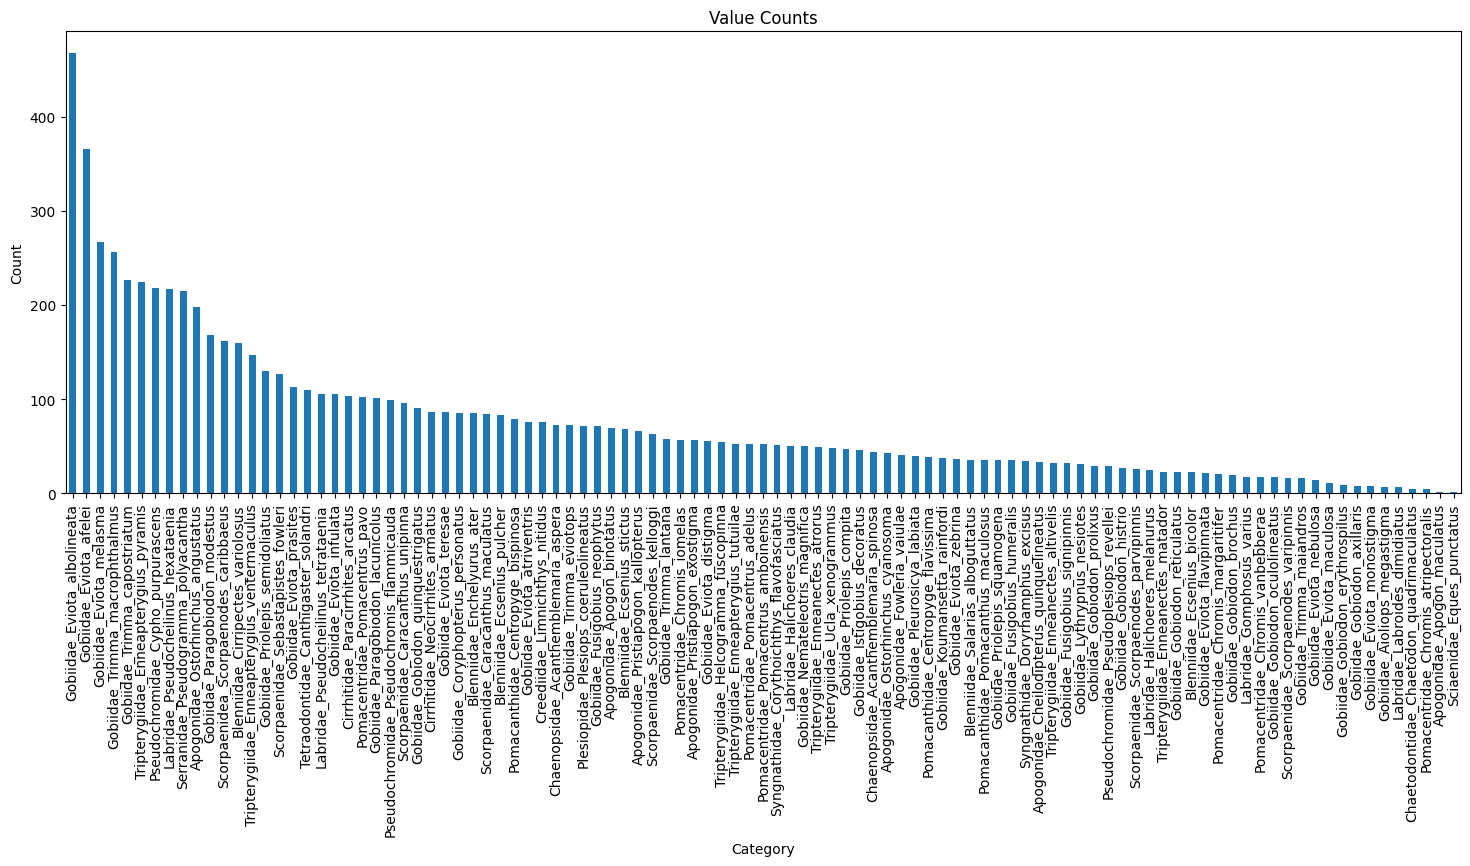

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate value counts
value_counts = df1['folder_label'].value_counts()

# Create the bar plot
plt.figure(figsize=(18, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [18]:

class CVDatasetSetup:
    
    def __init__(self):
        pass
    
        
    
    
    def rename_image_directory(self, source_path, prefix):
        
        for root, dirs, files in os.walk(source_path):
        

7672

In [32]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tqdm import tqdm
import hashlib

def detect_blurry_images(image_path, threshold=100):
    """
    Detect if an image is blurry using variance of the Laplacian.
    Args:
        image_path (str): Path to the image file.
        threshold (int): Blurriness threshold (lower is blurrier).
    Returns:
        bool: True if blurry, False otherwise.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()
    return laplacian_var < threshold

def calculate_image_hash(image_path):
    """
    Compute hash for an image to detect duplicates.
    """
    with open(image_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

def extract_embeddings(image_path, model):
    """
    Extract embeddings for an image using a pretrained model.
    Args:
        image_path (str): Path to the image file.
        model: Pretrained model (e.g., ResNet50).
    Returns:
        np.array: Embedding vector.
    """
    image = Image.open(image_path).resize((224, 224)).convert("RGB")
    image_array = img_to_array(image)
    image_array = preprocess_input(np.expand_dims(image_array, axis=0))
    embedding = model.predict(image_array, verbose=0)
    return embedding.flatten()

def find_outliers(embeddings, threshold=0.3):
    """
    Find outliers based on cosine similarity of embeddings.
    Args:
        embeddings (list of np.array): List of embedding vectors.
        threshold (float): Cosine similarity threshold for outliers.
    Returns:
        list: Indices of outlier embeddings.
    """
    similarity_matrix = cosine_similarity(embeddings)
    avg_similarities = similarity_matrix.mean(axis=1)
    return [i for i, sim in enumerate(avg_similarities) if sim < threshold]

def evaluate_images(input_path, pretrained_model, blur_threshold=100, similarity_threshold=0.3):
    """
    Evaluate images in a directory for quality and redundancy.
    Args:
        input_path (str): Path to the dataset folder.
        pretrained_model: Pretrained model for embedding extraction.
        blur_threshold (int): Blurriness threshold.
        similarity_threshold (float): Threshold for outlier detection.
    Returns:
        dict: Summary of flagged images (blurry, duplicates, outliers).
    """
    image_hashes = {}
    embeddings = []
    image_paths = []
    flagged_images = {"blurry": [], "duplicates": [], "outliers": []}
    
    # Process each image
    for root, _, files in os.walk(input_path):
        for file in tqdm(files):
            if file.lower().endswith(('jpg', 'jpeg', 'png')):
                image_path = os.path.join(root, file)
                image_paths.append(image_path)

                # Check for duplicates
                img_hash = calculate_image_hash(image_path)
                if img_hash in image_hashes:
                    flagged_images["duplicates"].append(image_path)
                    continue
                image_hashes[img_hash] = image_path

                # Check for blurriness
                if detect_blurry_images(image_path, threshold=blur_threshold):
                    flagged_images["blurry"].append(image_path)

                # Extract embeddings
                embeddings.append(extract_embeddings(image_path, pretrained_model))
    
    # Detect outliers
    outlier_indices = find_outliers(embeddings, threshold=similarity_threshold)
    flagged_images["outliers"] = [image_paths[i] for i in outlier_indices]

    return flagged_images



In [33]:
# Define paths and model
dataset_path = input("Enter dataset folder path: ").strip()
resnet_model = ResNet152V2(weights="imagenet", include_top=False, pooling="max")

# Evaluate images
flagged = evaluate_images(dataset_path, resnet_model)

# Print summary
print("Flagged Images Summary:")
print(f"Blurry Images: {len(flagged['blurry'])}")
print(f"Duplicate Images: {len(flagged['duplicates'])}")
print(f"Outliers: {len(flagged['outliers'])}")

# Optionally, save flagged images to a log file
with open("flagged_images_log.txt", "w") as log_file:
    for category, paths in flagged.items():
        log_file.write(f"\n{category.capitalize()}:\n")
        for path in paths:
            log_file.write(f"{path}\n")


100%|██████████| 133/133 [00:20<00:00,  6.46it/s]

Flagged Images Summary:
Blurry Images: 55
Duplicate Images: 0
Outliers: 0
